## Data Ingestion

#### Dataset
The primary goal of this project is to build a predictive model that can accurately estimate delivery times for 

e-commerce orders based on various factors such as agent characteristics, geographic distance, time variables, weather 

conditions, traffic, and product categories.

#### Independent Features (Predictors):

* Order_ID: Unique identifier for each order.

* Agent_Age: Age of the delivery agent.

* Agent_Rating: Rating of the delivery agent.

* Store_Latitude/Longitude: Geographic location of the store.

* Drop_Latitude/Longitude: Geographic location of the delivery address.

* Order_Date/Order_Time: Date and time when the order was placed.

* Pickup_Time: Time when the delivery agent picked up the order.

* Weather: Weather conditions during delivery.

* Traffic: Traffic conditions during delivery.

* Vehicle: Mode of transportation used for delivery.

* Area: Type of delivery area (Urban/Metropolitan).

* Category: Category of the product being delivered.

#### Dependent Feature (Target Variable):

* Delivery_Time: Target variable representing the actual time taken for delivery (in hours).


In [26]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [27]:
data=pd.read_csv("/Users/nehadhananju/Desktop/AmazonDeliveryTimePrediction/data/amazon_delivery.csv")

## EDA 

In [28]:
data.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [29]:
data.shape

(43739, 16)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [31]:
# Checking the null values

data.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [32]:
# Checking the duplicate values

data.duplicated().sum()

0

####  Separate Variables

In [35]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()


In [37]:
# Remove Order_ID from categorical (it's an identifier)
if 'Order_ID' in categorical_cols:
    categorical_cols.remove('Order_ID')

# Check for low-cardinality numerical variables that should be categorical
low_cardinality_numerical = []
for col in numerical_cols:
    if data[col].nunique() < 10 and col != 'Delivery_Time':  # Exclude target variable
        low_cardinality_numerical.append(col)

# Move them to categorical
numerical_cols = [col for col in numerical_cols if col not in low_cardinality_numerical]
categorical_cols.extend(low_cardinality_numerical)

# DateTime columns
datetime_cols = ['Order_Date', 'Order_Time', 'Pickup_Time']

print(f"Numerical Variables: {numerical_cols}")
print(f"Categorical Variables: {categorical_cols}")
print(f"DateTime Variables: {datetime_cols}")


Numerical Variables: ['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Delivery_Time']
Categorical Variables: ['Order_Date', 'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Category']
DateTime Variables: ['Order_Date', 'Order_Time', 'Pickup_Time']


#### Numerical EDA 

=== NUMERICAL VARIABLES EDA ===

Basic Statistics:
          Agent_Age  Agent_Rating  Store_Latitude  Store_Longitude  \
count  43739.000000  43685.000000    43739.000000     43739.000000   
mean      29.567137      4.633780       17.210960        70.661177   
std        5.815155      0.334716        7.764225        21.475005   
min       15.000000      1.000000      -30.902872       -88.366217   
25%       25.000000      4.500000       12.933298        73.170283   
50%       30.000000      4.700000       18.551440        75.898497   
75%       35.000000      4.900000       22.732225        78.045359   
max       50.000000      6.000000       30.914057        88.433452   

       Drop_Latitude  Drop_Longitude  Delivery_Time  
count   43739.000000    43739.000000   43739.000000  
mean       17.459031       70.821842     124.905645  
std         7.342950       21.153148      51.915451  
min         0.010000        0.010000      10.000000  
25%        12.985996       73.280000      90.000

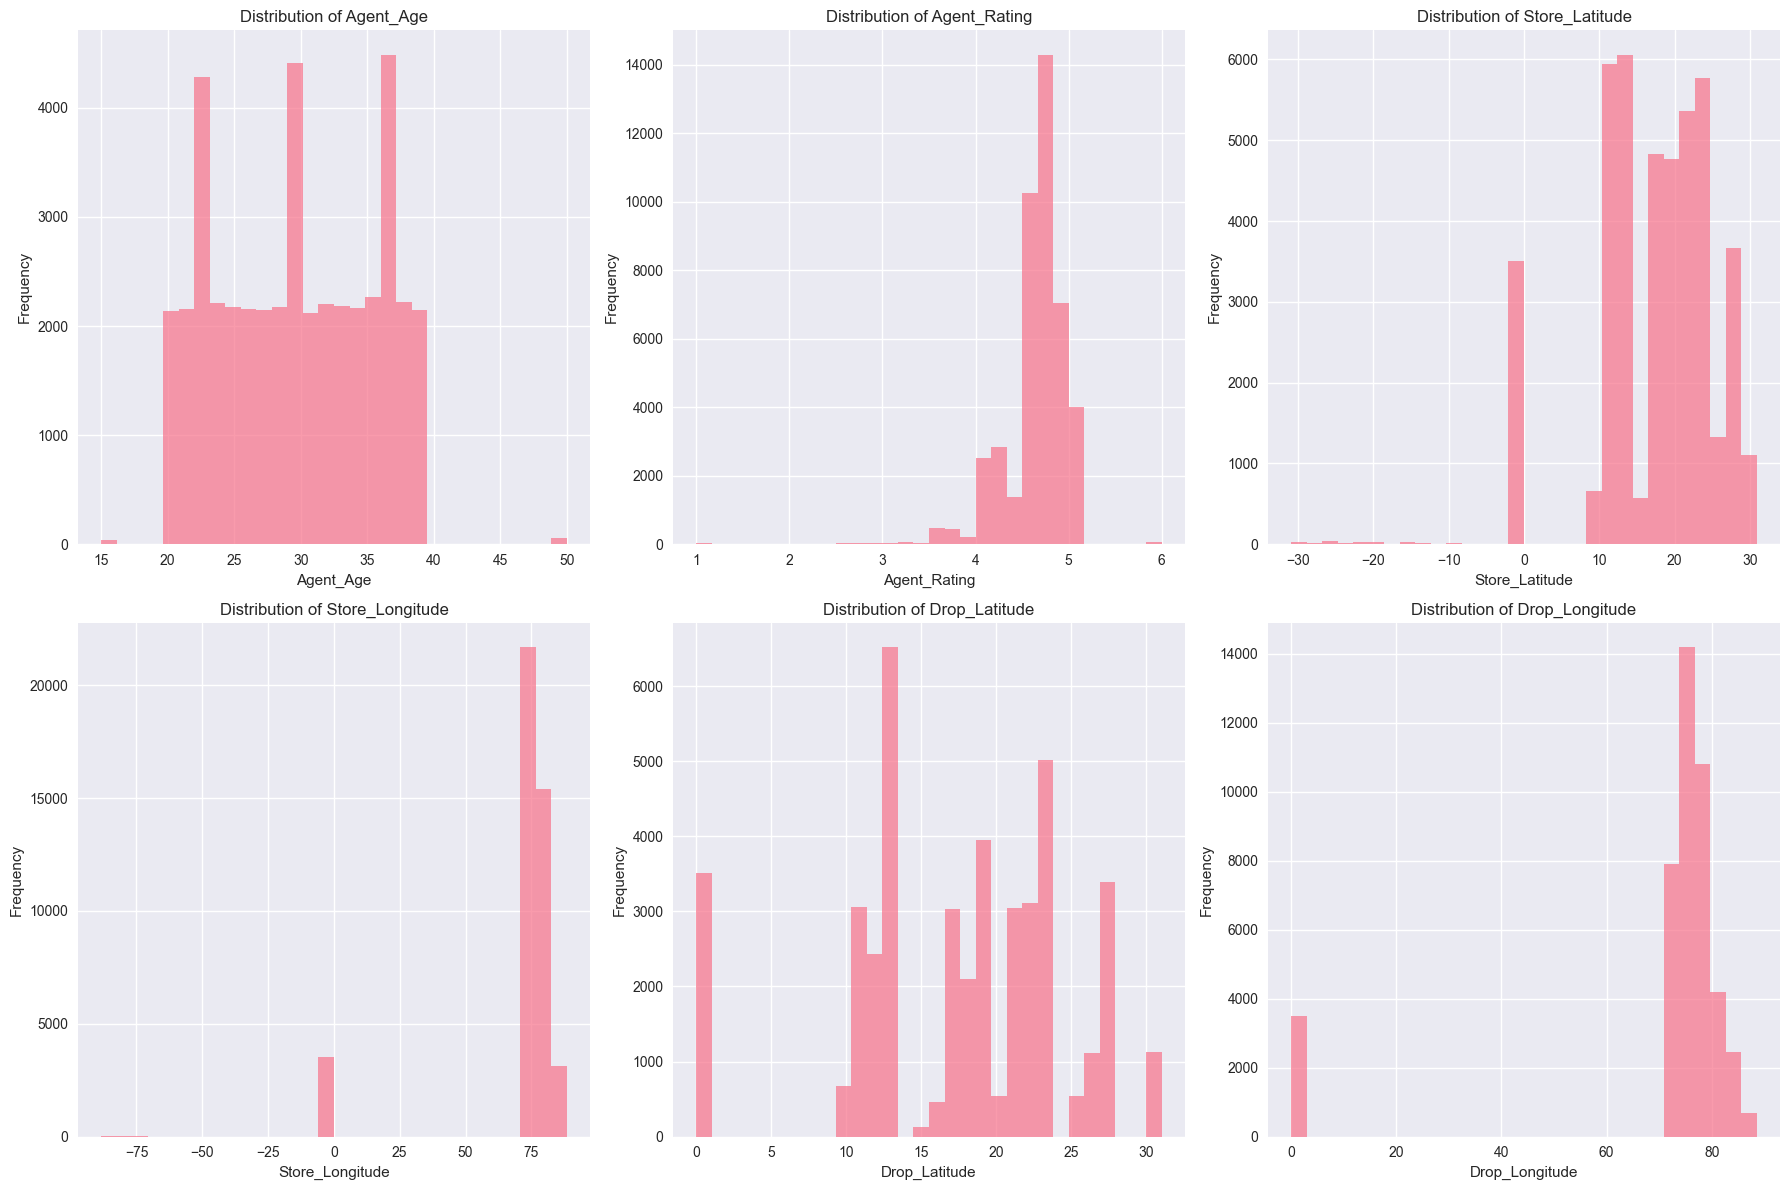

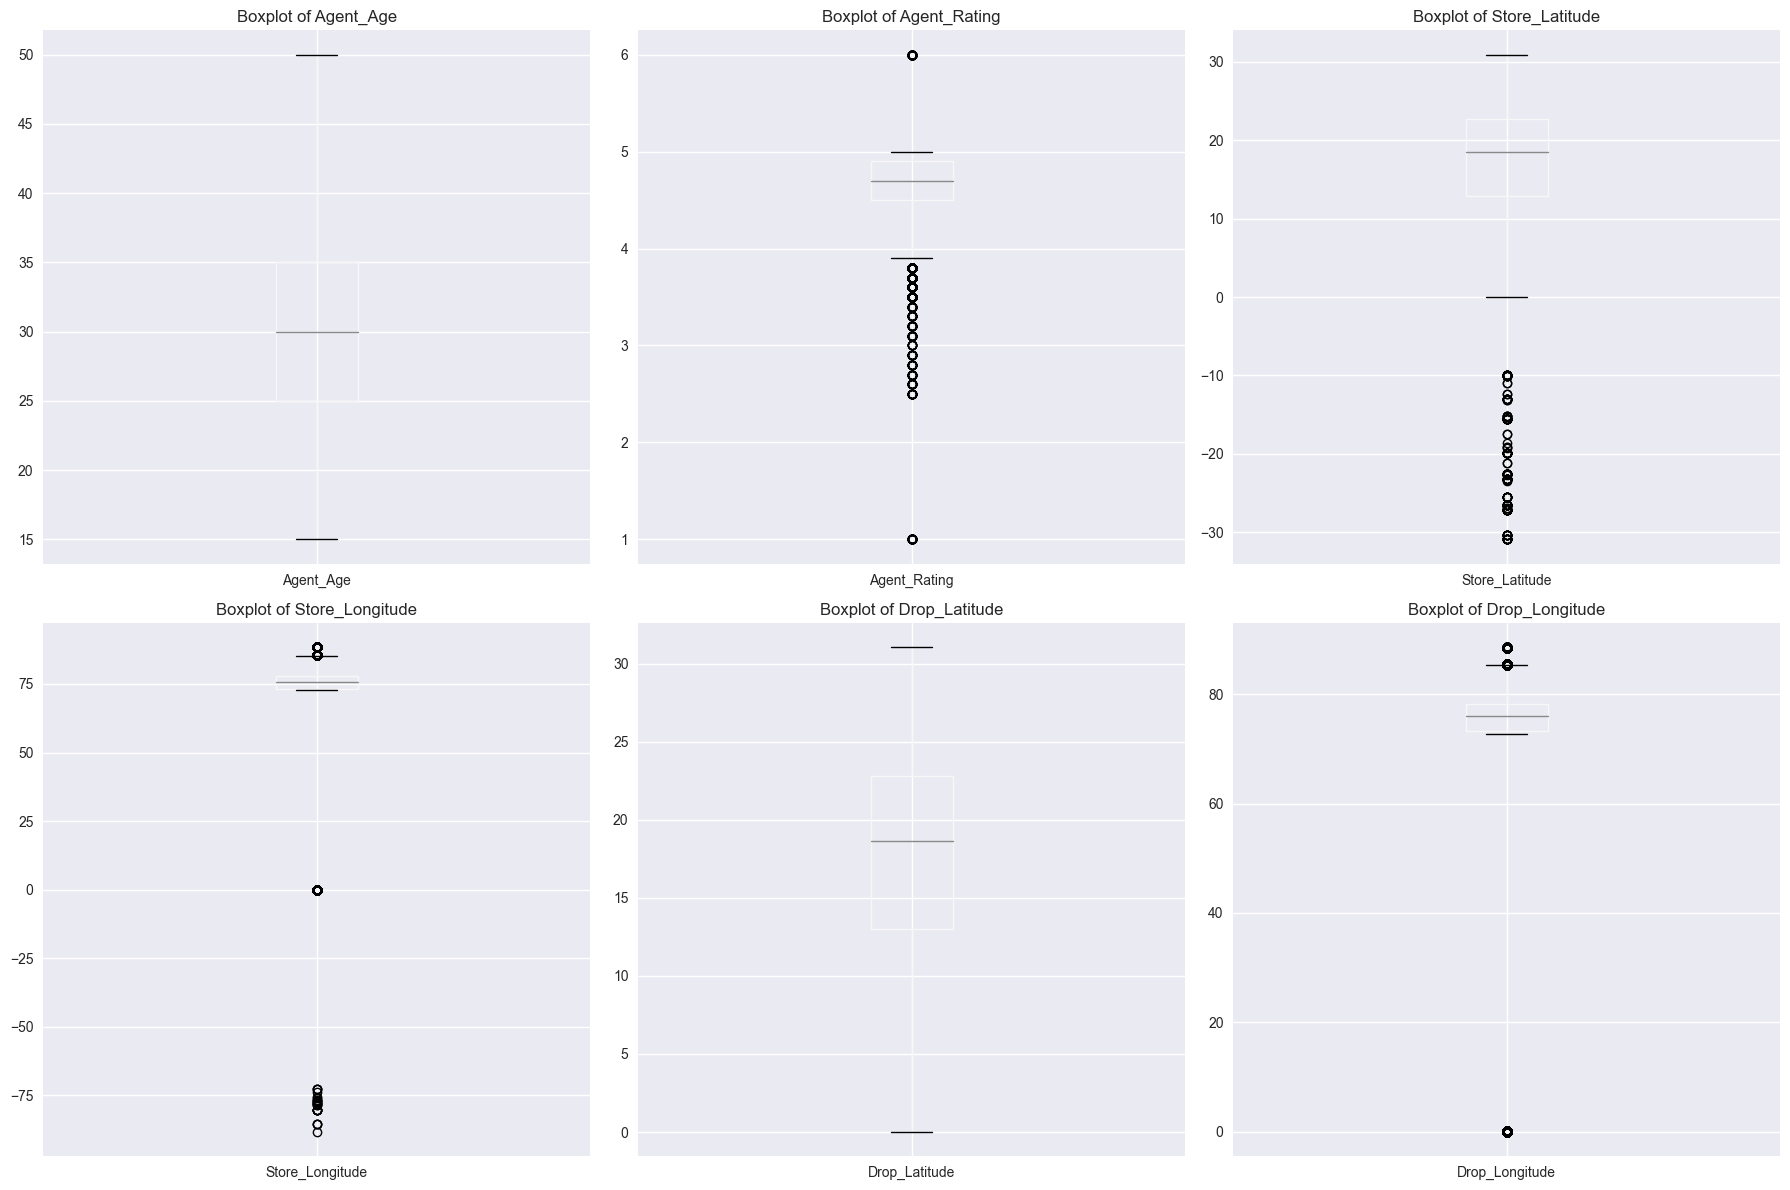

In [ ]:
print("=== NUMERICAL VARIABLES EDA ===")

# Basic statistics
print("\nBasic Statistics:")
print(data[numerical_cols].describe())

# Check for missing values
print("\nMissing Values in Numerical Variables:")
print(data[numerical_cols].isnull().sum())

# Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < 6:
        data[col].hist(bins=30, ax=axes[i], alpha=0.7)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Boxplots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < 6:
        data.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

#### Correlation Analysis

Correlation Matrix:


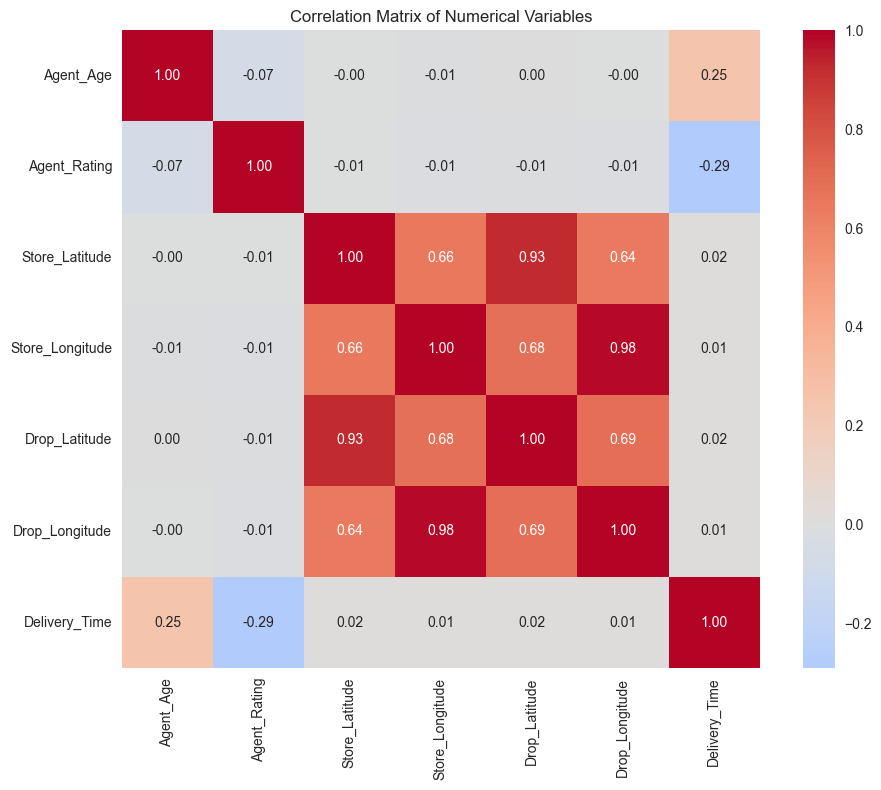

Correlation with Delivery_Time:
Delivery_Time      1.000000
Agent_Age          0.254618
Store_Latitude     0.017009
Drop_Latitude      0.016928
Drop_Longitude     0.011523
Store_Longitude    0.011173
Agent_Rating      -0.289984
Name: Delivery_Time, dtype: float64


In [39]:
# Correlation matrix
print("Correlation Matrix:")
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Correlation with target variable
print("Correlation with Delivery_Time:")
correlation_with_target = data[numerical_cols].corr()['Delivery_Time'].sort_values(ascending=False)
print(correlation_with_target)

#### Categorical Variables EDA

=== CATEGORICAL VARIABLES EDA ===
Value Counts for Categorical Variables:

Order_Date:
Order_Date
2022-03-15    1141
2022-04-03    1133
2022-03-13    1123
2022-03-26    1119
2022-03-03    1119
2022-03-09    1117
2022-03-05    1112
2022-03-24    1112
2022-03-21    1107
2022-04-05    1106
2022-03-19    1103
2022-03-11    1094
2022-03-07    1093
2022-04-01    1092
2022-03-28    1092
2022-03-30    1091
2022-03-17    1085
2022-03-01    1076
2022-03-02     969
2022-03-16     955
2022-03-06     949
2022-03-10     947
2022-03-20     945
2022-04-02     945
2022-03-04     944
2022-02-11     940
2022-03-29     938
2022-03-18     932
2022-03-27     932
2022-03-25     931
2022-03-14     931
2022-03-12     931
2022-03-31     929
2022-02-13     924
2022-03-23     922
2022-03-08     919
2022-04-06     918
2022-04-04     905
2022-02-17     905
2022-02-15     904
2022-02-12     837
2022-02-16     827
2022-02-14     826
2022-02-18     819
Name: count, dtype: int64
Number of unique values: 44

Order_Time:

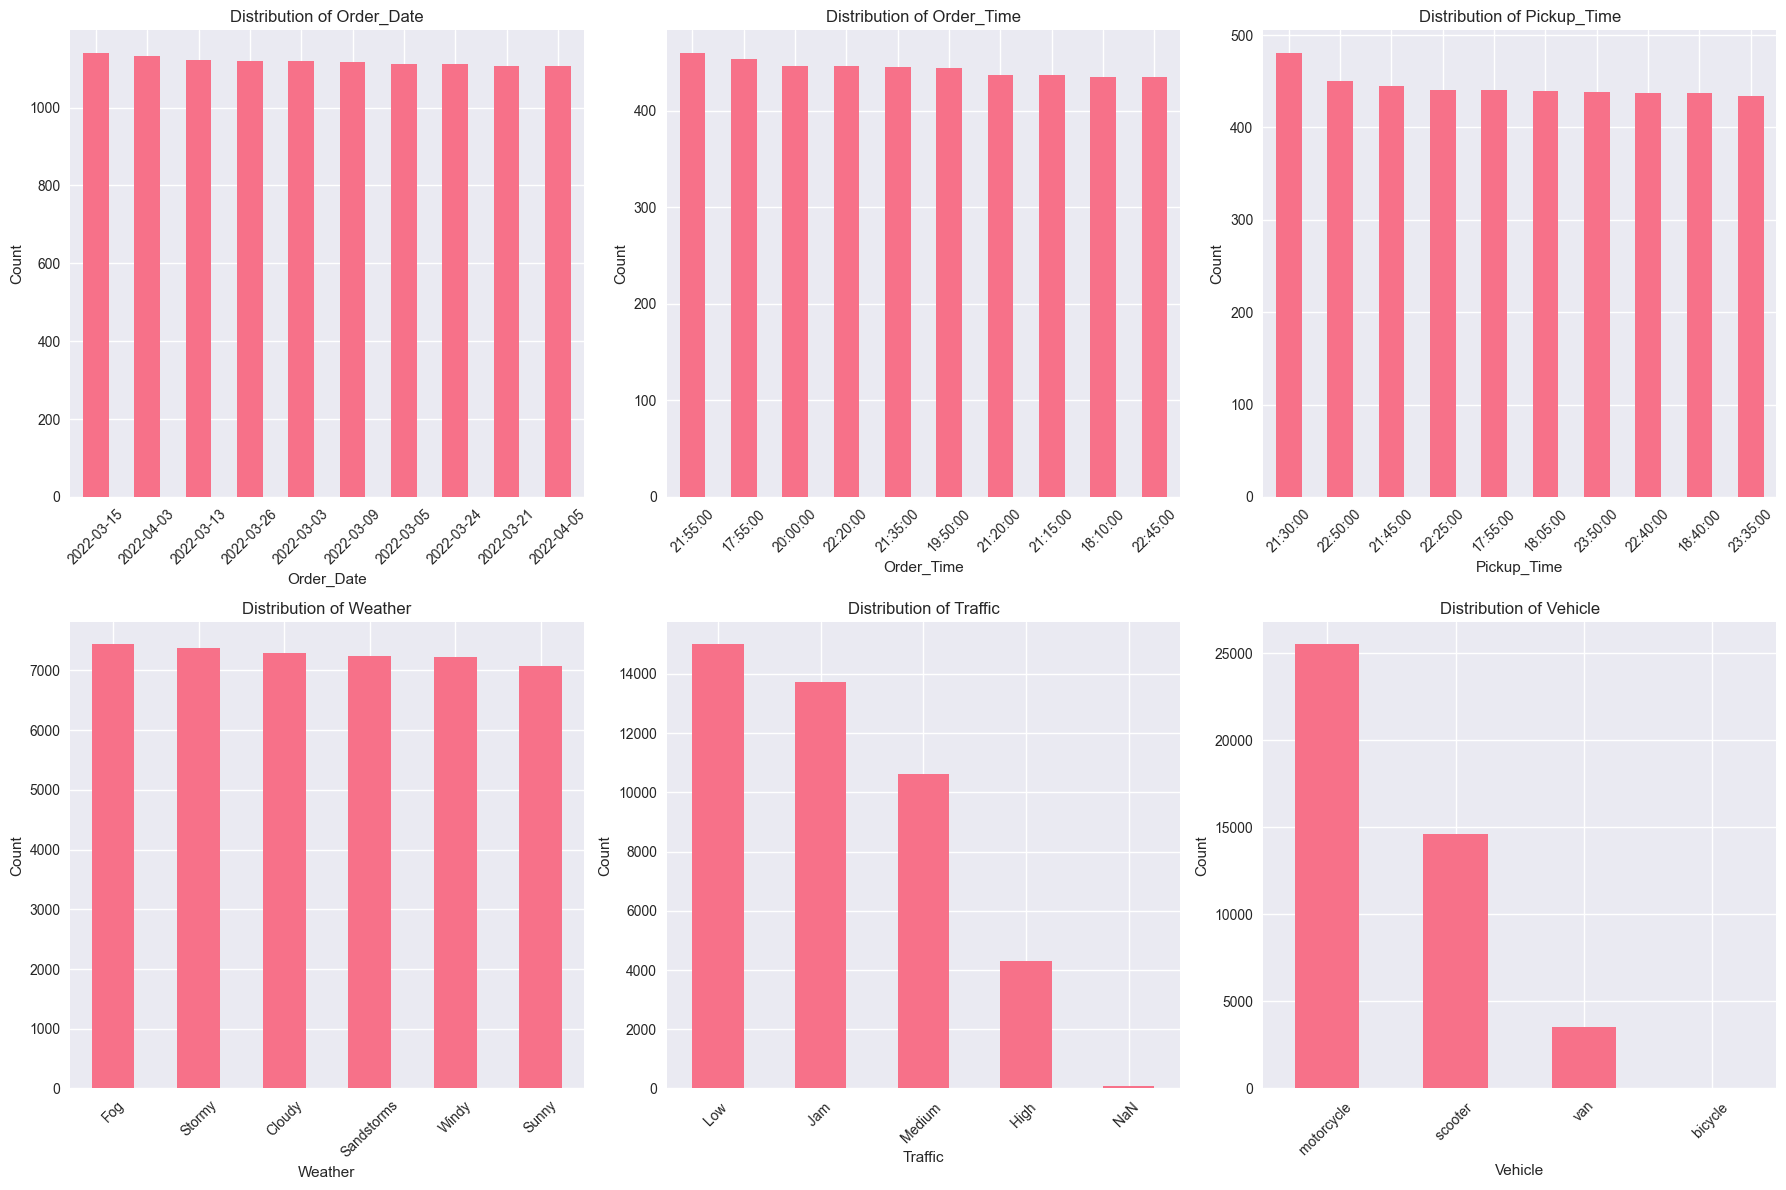

In [40]:
print("=== CATEGORICAL VARIABLES EDA ===")

print("Value Counts for Categorical Variables:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(data[col].value_counts())
    print(f"Number of unique values: {data[col].nunique()}")

# Bar plots for categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < 6:
        value_counts = data[col].value_counts()
        if len(value_counts) > 10:  # If too many categories, show top 10
            value_counts = value_counts.head(10)
        value_counts.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Agent_Age'}>,
        <Axes: title={'center': 'Agent_Rating'}>,
        <Axes: title={'center': 'Store_Latitude'}>],
       [<Axes: title={'center': 'Store_Longitude'}>,
        <Axes: title={'center': 'Drop_Latitude'}>,
        <Axes: title={'center': 'Drop_Longitude'}>],
       [<Axes: title={'center': 'Delivery_Time'}>, <Axes: >, <Axes: >]],
      dtype=object)

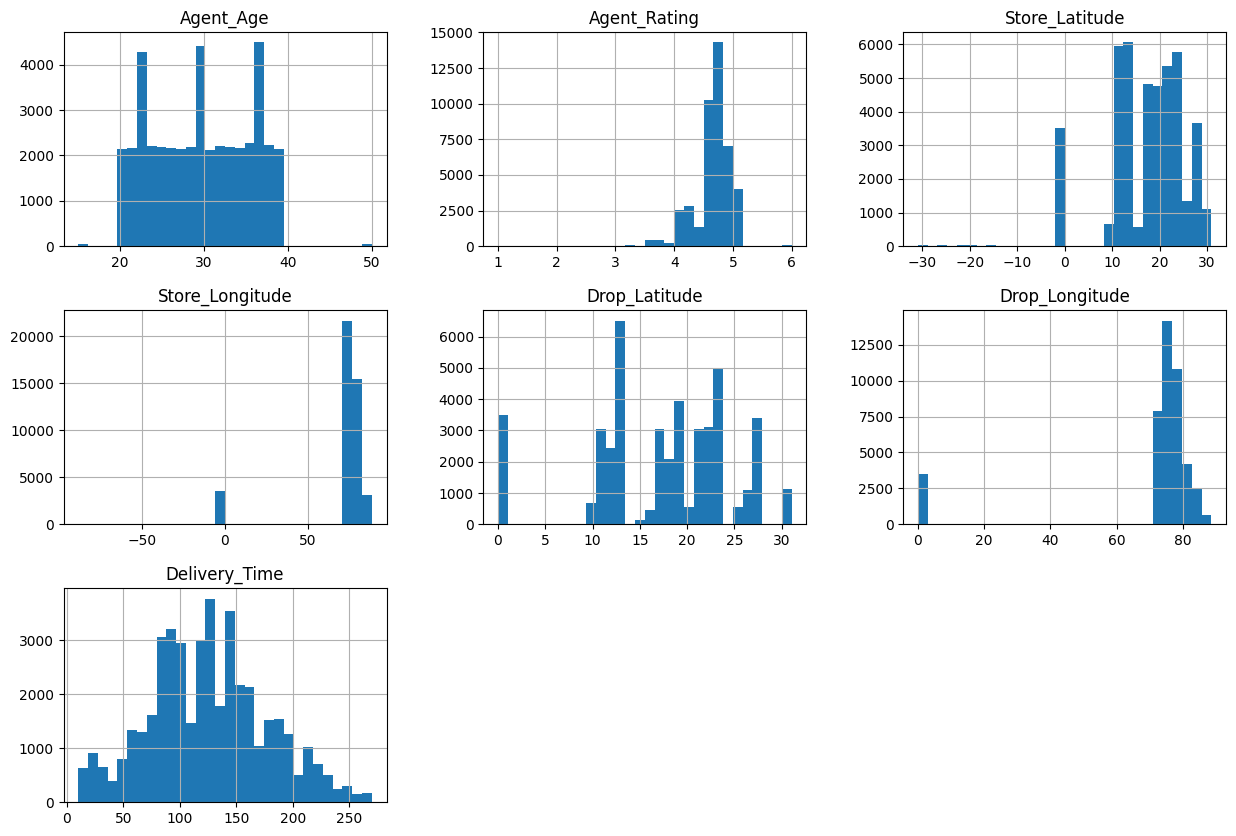

In [16]:
data[numerical_cols].describe()
data[numerical_cols].hist(bins=30, figsize=(15, 10))

Order_ID: Order_ID
ialx566343618    1
qzgi619412151    1
weiw108744994    1
pfvr771559834    1
odmp530175660    1
                ..
yjwk928768239    1
mori995207669    1
bxnf323229063    1
knka353994987    1
nsyz997960170    1
Name: count, Length: 43739, dtype: int64
Order_Date: Order_Date
2022-03-15    1141
2022-04-03    1133
2022-03-13    1123
2022-03-26    1119
2022-03-03    1119
2022-03-09    1117
2022-03-05    1112
2022-03-24    1112
2022-03-21    1107
2022-04-05    1106
2022-03-19    1103
2022-03-11    1094
2022-03-07    1093
2022-04-01    1092
2022-03-28    1092
2022-03-30    1091
2022-03-17    1085
2022-03-01    1076
2022-03-02     969
2022-03-16     955
2022-03-06     949
2022-03-10     947
2022-03-20     945
2022-04-02     945
2022-03-04     944
2022-02-11     940
2022-03-29     938
2022-03-18     932
2022-03-27     932
2022-03-25     931
2022-03-14     931
2022-03-12     931
2022-03-31     929
2022-02-13     924
2022-03-23     922
2022-03-08     919
2022-04-06     918
2022-

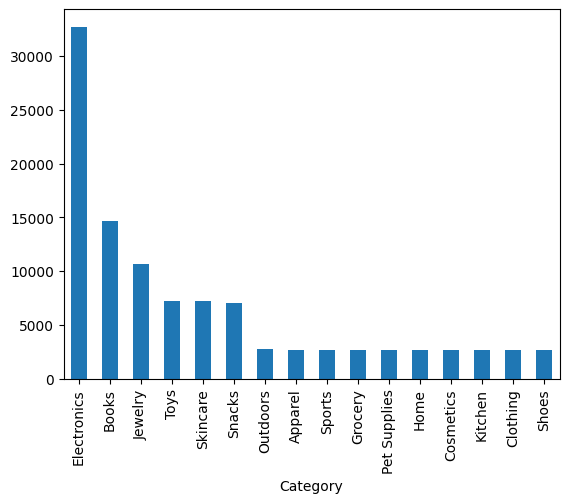

In [17]:
for col in categorical_cols:
    print(f"{col}: {data[col].value_counts()}")
    data[col].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Distribution of Delivery Time')

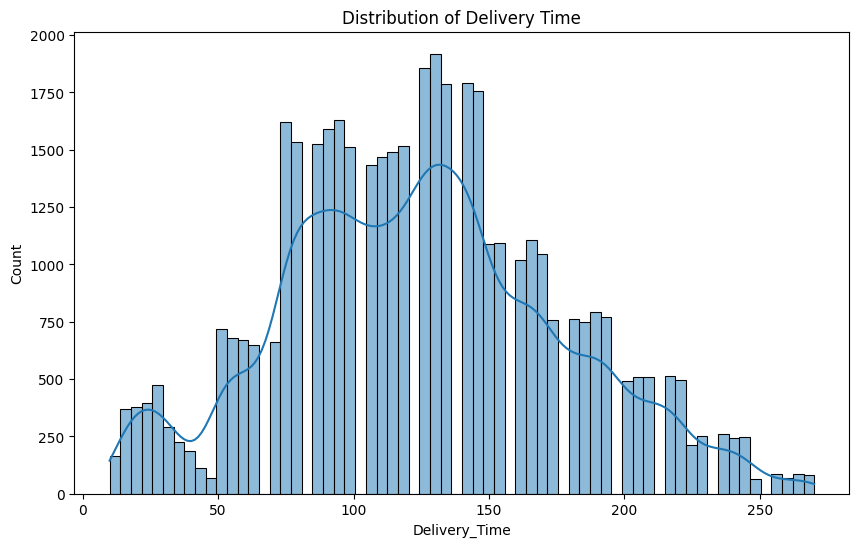

In [13]:
# Check target variable distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Delivery_Time'], kde=True)
plt.title('Distribution of Delivery Time')


Text(0.5, 1.0, 'Corelation heatmap')

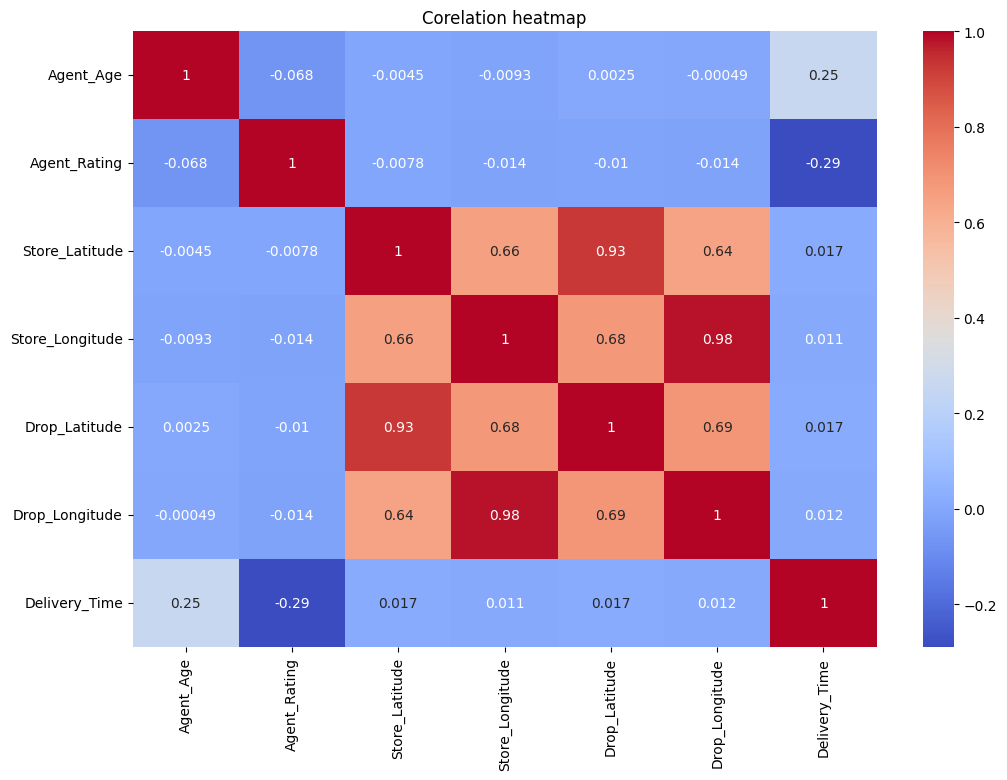

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Corelation heatmap')
